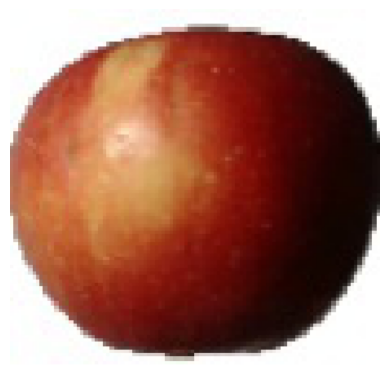

(227, 227, 3)
class             Count:
------------------------
Cactus fruit         490
Cherry Wax Yellow    492
Cauliflower          702
Apple Red Delicious  490
Banana Red           490
Apple Red Yellow 2   672
Apple Braeburn       492
Apple Red 1          492
Carambula            490
Apple Crimson Snow   444
Apple Golden 1       480
Apple Golden 3       481
Avocado              427
Avocado ripe         491
Apricot              492
Apple Red 2          492
Cherry Wax Black     492
Apple Red Yellow 1   492
Apple Golden 2       492
Banana Lady Finger   450
Cantaloupe 1         492
Clementine           490
Apple Granny Smith   492
Blueberry            462
Chestnut             450
Beetroot             450
Apple Pink Lady      456
Cherry 2             738
Cherry Wax Red       492
Banana               490
Cherry Rainier       738
Cantaloupe 2         492
Cherry 1             492
Apple Red 3          429
------------------------
Number of classes :  34


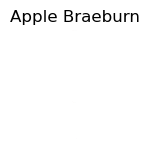

34


In [3]:
#############################################################################################################
    #Copyright (c) 2023, 2024 , Prof. Radhamadhab Dalai, ITER , Siksha O Aanusandhan University
    #Odisha, India,
    #Author's email address :  radhamadhabdalai@soa.ac.in
 ############################################################################################################

#importing necessary libraries
import os
import cv2
from glob import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

cv2.__version__
#Setting Training dir paths
train_path = 'fruits-360/Training/'
#Setting Test dir paths        
test_path = 'fruits-360/Test/'

#Displaying the image
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(227,227))
plt.imshow(img)
plt.axis("off")
plt.show()

#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

#Visualizing more Images from each class
# images = ['apple', 'cabbage', 'carrot', 'cucumber', 'eggplant', 'pear', 'zucchini']
images = ['Apple Braeburn']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(227,227)))

#Getting the count of images for each class
image_count = []
class_names = []
print('{:18s}'.format('class'), end='')
print('Count:')
print('-' * 24)
#Reading the image from each folder from training path
for folder in os.listdir(train_path):
    folder_num = len(os.listdir(os.path.join(train_path,folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)
print('-' * 24)    
print("Number of classes : ",len(class_names))

#Plotting the count of images for each class
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x=class_names, y=image_count)
plt.ylabel('Number of images in each class')
plt.show()

#Finding number of classes
className = glob(train_path + '/*')
num_classes = len(className)
print(num_classes)

In [6]:
#Using Alexnet architecture. input is 227, 227,3 image and output is 7 classes of fruits 
model = tf.keras.models.Sequential([
    #1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #Passing it to a Fully Connected layer
    tf.keras.layers.Flatten(),
    # 1st Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),# Add Dropout to prevent overfitting
    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    # 3rd Fully Connected Layer
    tf.keras.layers.Dense(1000, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    #Output Layer
    # tf.keras.layers.Dense(7, activation='softmax'),
    tf.keras.layers.Dense(34, activation='softmax'),
    #tf.keras.layers.BatchNormalization()
])


# plot graph
plot_model(model, to_file='fruit_classification.png')

model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

#Getting model's summary
model.summary()

#Specifing epochs & batch size
epochs = 40
batch_size = 16
image_height = 227
image_width = 227

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_6 (Bat  (None, 55, 55, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_7 (Bat  (None, 2

In [ ]:
#Creating an object of ImageDataGenerator for augmenting training dataset
train_datagen = ImageDataGenerator(rescale= 1./255,
rotation_range=10,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest')

#Creating an object of ImageDataGenerator for augmenting test dataset
test_datagen = ImageDataGenerator(rescale= 1./255)


#Generating batches of Augmented data of image size 227, 227 and batch size of 32
train_generator = train_datagen.flow_from_directory(
directory = train_path, 
target_size= (image_height, image_width), # resize to this size
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical"
)

test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size=(image_height, image_width),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

nb_train_samples = train_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())

from keras.callbacks import ReduceLROnPlateau
#Callback to save the best model. Using checkpoint and earlystopping to monitor validation accuracy
callbacks_list = [
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=10, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='fruit_model.h5',
        monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,verbose=1)
]


#Fitting the model
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=test_generator,
        verbose = 1,
        validation_steps=nb_test_samples // batch_size)

#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

# model evaluation
score = model.evaluate(test_generator)
print('test loss:', score[0])
print('test accuracy:', score[1])


# save the whole model
model.save("./fruit_model.h5")


# make a prediction for a new image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

sample_path='./Dataset/Dataset/new_samples/'
img = load_img(sample_path + "r0_6.jpg", target_size=(227,227))
plt.imshow(img)
plt.axis("off")
plt.show()


def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, color_mode="rgb", target_size=(227, 227, 3))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 227, 227, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img


img = load_image(sample_path + "r0_2.jpg")
model = load_model('fruit_model.h5')


# predict the class
predict_x=model.predict(img)
result=np.argmax(predict_x,axis=1)
if result[0] == 0:
    print("Apple")
elif result[0] == 1:
    print("cabbage")
elif result[0] == 2:
    print("carrot")
elif result[0] == 3:
    print("cucumber")
elif result[0] == 4:
    print("eggplant")
elif result[0] == 5:
    print("pear")
elif result[0] == 6:
    print("zucchini")
else:
    print("Not in the list")


Found 17206 images belonging to 34 classes.
Found 5756 images belonging to 34 classes.
Epoch 1/40
 748/1075 [===================>..........] - ETA: 4:20 - loss: 3.9336 - accuracy: 0.0524